# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [140]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import random
import sklearn.datasets as dta
from scipy.stats import linregress

#%matplotlib notebook
%config Completer.use_jedi = False

# Set a seed so data is reproduceable
#random.seed(42)

# Study data files for this analysis
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# print(mouse_metadata)
# print(study_results)

# Combine the data into a single dataset
merged_dataset_df = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_dataset_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [141]:
# Checking the number of mice.

mice_count_in_file = mouse_metadata["Mouse ID"].count()
print(mice_count_in_file)

unique_mice_id_in_merge = merged_dataset_df["Mouse ID"].unique()

total_mice_in_merge = len(unique_mice_id_in_merge)
total_mice_in_merge

249


249

In [142]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mice_data_groupby = merged_dataset_df.groupby(['Mouse ID','Timepoint']) 
#print(mice_data_groupby)

duplicate_rows = study_results[study_results.duplicated(subset=['Mouse ID','Timepoint'], keep='first')]  
#duplicate_rows

duplicate_mouse_ids = merged_dataset_df.loc[merged_dataset_df.duplicated(subset=['Mouse ID','Timepoint']), 'Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [143]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_dataset_df[merged_dataset_df['Mouse ID'].isin(duplicate_mouse_ids)==True]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [144]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataset_df = merged_dataset_df[merged_dataset_df['Mouse ID'].isin(duplicate_mouse_ids) == False]
clean_dataset_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [145]:
# Checking the number of mice in the clean DataFrame.
len(clean_dataset_df['Mouse ID'].unique())

248

## Summary Statistics

In [147]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_summary_df = clean_dataset_df.groupby(clean_dataset_df['Drug Regimen'])

tumor_volume_mean = drug_regimen_summary_df['Tumor Volume (mm3)'].mean()
tumor_volume_mean

tumor_volumne_median = drug_regimen_summary_df['Tumor Volume (mm3)'].median()
tumor_volumne_median

tumor_vol_var_test = drug_regimen_summary_df['Tumor Volume (mm3)'].var()
#print(tumor_vol_var_test)

tumor_vol_std_test = drug_regimen_summary_df['Tumor Volume (mm3)'].agg(np.std)
#.std .sem
#print(tumor_vol_std_test)

tumor_vol_sem_test = drug_regimen_summary_df['Tumor Volume (mm3)'].agg(st.sem)
#print(tumor_vol_sem_test)

first_summary_table_df = pd.DataFrame({ 
                                        "Drug Reg. Mean": tumor_volume_mean,
                                        "Median Tumor Volume": tumor_volumne_median,
                                        "Tumor Volume Variance": tumor_vol_var_test,
                                        "Tumor Volume Std. Dev.": tumor_vol_std_test,
                                        "Tumor Volume Std. Err.": tumor_vol_sem_test
                                     })
first_summary_table_df

,Drug Reg. Mean,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_regimen_summary2_df = clean_dataset_df.groupby(clean_dataset_df['Drug Regimen']).agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})

drug_regimen_summary2_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

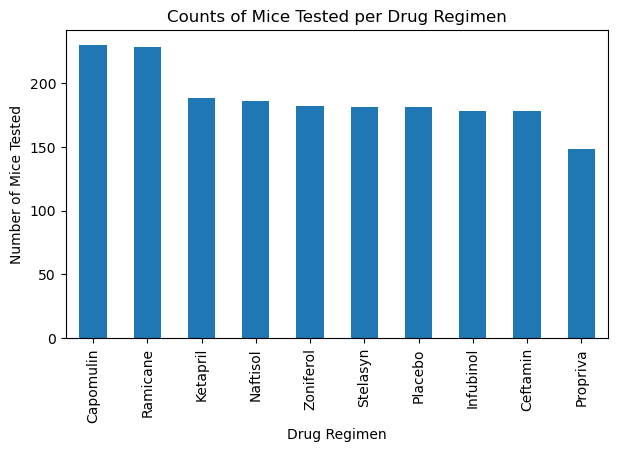

In [149]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_series = clean_dataset_df['Drug Regimen'].value_counts()
#print(drug_regimen_series)

drug_regimen_bar = drug_regimen_series.plot(kind="bar", figsize=(7,4), title="Counts of Mice Tested per Drug Regimen", xlabel="Drug Regimen", ylabel="Number of Mice Tested")
#facecolor="blue",


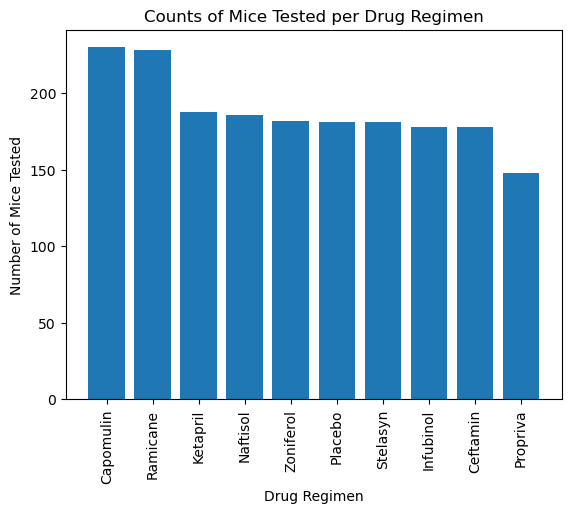

In [150]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(0,len(drug_regimen_series))
# print(x_axis)

x_labels = []
for x in x_axis:
    x_labels.append(x)
    
# print(x_labels)

drug_regimen_labels = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Infubinol", "Ceftamin", "Propriva"]

plt.bar(x_axis,drug_regimen_series, alpha=1)
plt.xticks(x_labels, drug_regimen_labels, rotation="90")

plt.title("Counts of Mice Tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

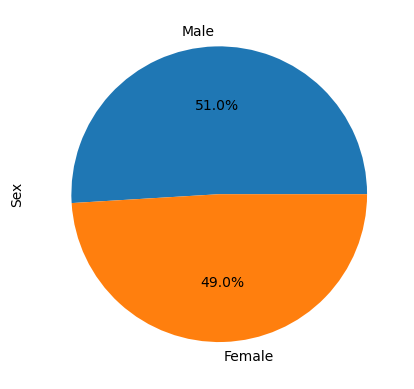

In [97]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_sex_series = clean_dataset_df['Sex'].value_counts()
#print(mice_sex_series)

mice_sex_series.plot(kind="pie", autopct="%1.1f%%")
plt.show()

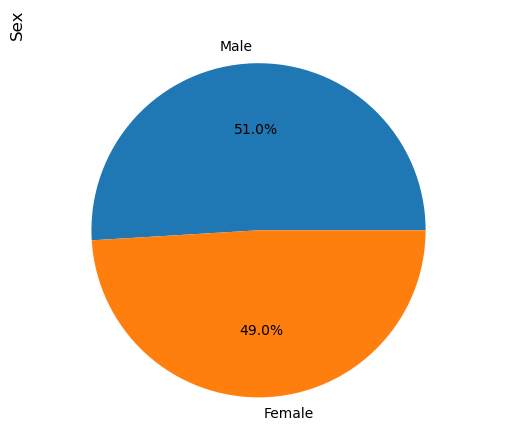

In [119]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_labels=["Male","Female"]

plt.pie(mice_sex_series, labels=sex_labels, autopct="%1.1f%%")
plt.title("Sex", loc="left", rotation=90) 

plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [156]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor_timepoint = clean_dataset_df.groupby(["Mouse ID"])['Timepoint'].max() #brings back just the Timepoint column + index
max_tumor_timepoint = max_tumor_timepoint.reset_index()
#print(max_tumor_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data_df = max_tumor_timepoint.merge(clean_dataset_df,on=['Mouse ID','Timepoint'],how="left")
merged_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [157]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug_reg in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merged_data_df.loc[merged_data["Drug Regimen"] == drug_reg, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug_reg}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


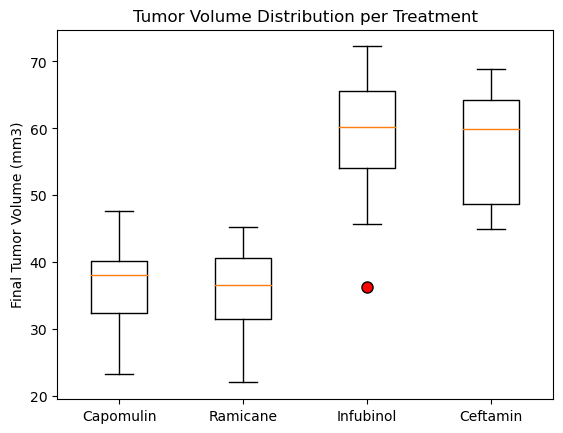

In [165]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()

red_outlier = dict(markerfacecolor='red', markersize=8)

ax1.boxplot(tumor_vol_data_list, labels=treatments, flierprops=red_outlier)
ax1.set_title('Tumor Volume Distribution per Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

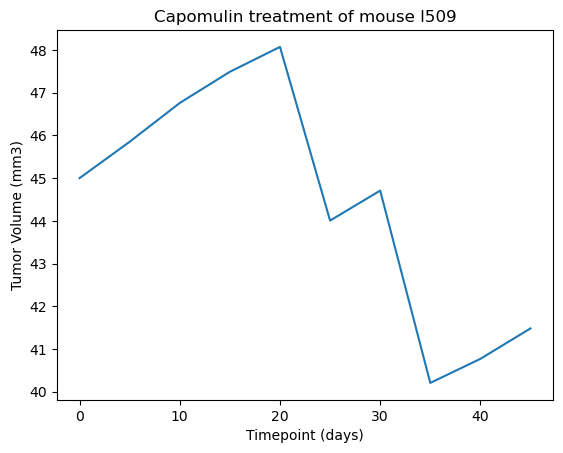

In [159]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_dataset_df = clean_dataset_df.loc[(clean_dataset_df["Drug Regimen"] == "Capomulin") & (clean_dataset_df["Mouse ID"] == "l509")]
#print(capomulin_dataset_df)

plt.plot(capomulin_dataset_df["Timepoint"], capomulin_dataset_df["Tumor Volume (mm3)"] )
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

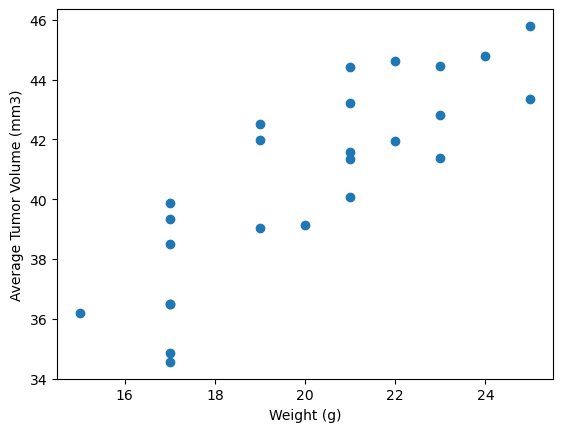

In [160]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_dataset_df = clean_dataset_df.loc[clean_dataset_df["Drug Regimen"] == "Capomulin"]
#print(capomulin_dataset_df)

capomulin_average = capomulin_dataset_df.groupby(['Mouse ID']).mean()
#print(capomulin_average)

plt.scatter(capomulin_average["Weight (g)"],  capomulin_average["Tumor Volume (mm3)"] )
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


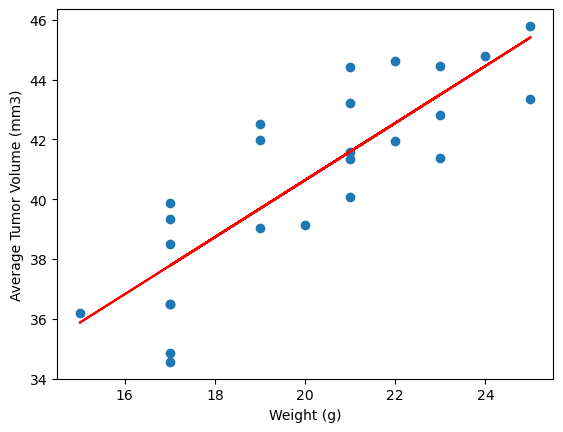

In [161]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_value = capomulin_average["Weight (g)"]
y_value = capomulin_average["Tumor Volume (mm3)"]

correlation = st.pearsonr(x_value, y_value)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress((x_value, y_value))
regress_values = x_value * slope + intercept

plt.scatter(x_value, y_value)
plt.plot(x_value, regress_values, 'r-')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
